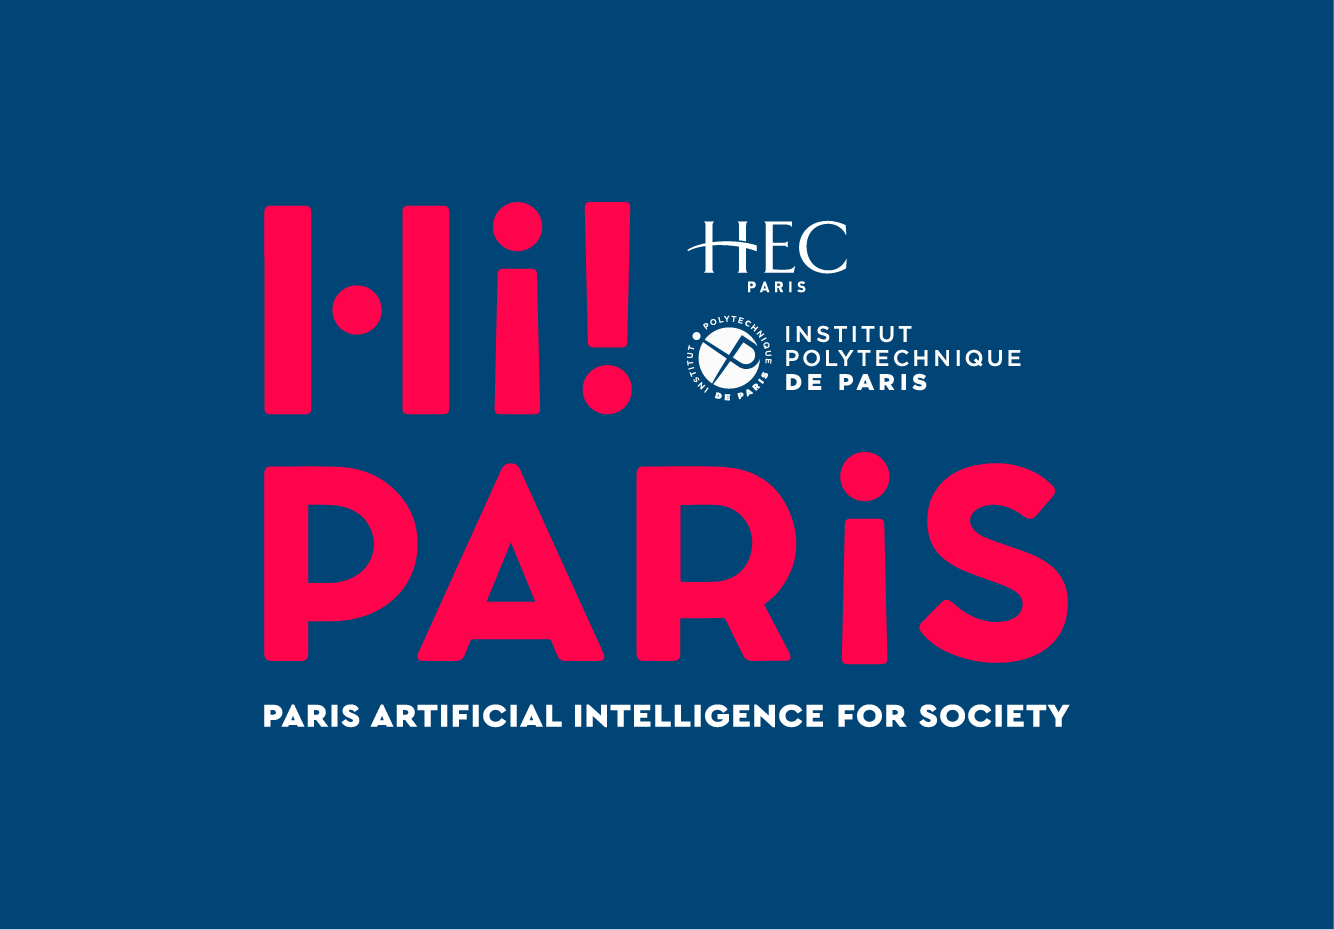

In [1]:
from IPython import display
display.Image("../src/figures/Hi!PARIS_logo_bleu.png")

<br>
<body>
    <p style="font-size:50px;text-align:center; color:#004475"><b><span style="color: #e61853">Hi!</span>ckathon 3</b></p><br>
    <p style="font-size:35px;text-align:center; color:#004475">Week 3 
    <p style="font-size:35px;text-align:center; color:#004475"> Preventing overfitting </p><br>
    <p style="font-size:25px;text-align:center; color:#004475">Estimated duration : 1h</p><br>
    <br><p style="font-size:15px;text-align:center; color:#004475"><b>Author : Gaëtan Brison </b></p><br>
</body>
<br>

# Feature selection

Feature Selection is one of the core concepts in machine learning which hugely impacts the performance of your model. The data features that you use to train your machine learning models have a huge influence on the performance you can achieve.

Irrelevant or partially relevant features can negatively impact model performance.Feature selection and Data cleaning should be the first and most important step of your model designing.

In this colab, you will discover feature selection techniques that you can use in Machine Learning.





<center><img src="https://i.postimg.cc/BbZwFZNP/Screenshot-2022-11-24-at-10-55-38.png" width=400 height=300/></center>


---
We prepared a model by selecting all the features and I got an accuracy of around 65% which is not pretty good for a predictive model and after doing some feature selection and feature engineering without doing any logical changes in my model code my accuracy jumped to 81% which is quite impressive 📈

---


How to select features and what are Benefits of performing feature selection before modeling your data?

· **Reduces Overfitting** : Less redundant data means less opportunity to make decisions based on noise.

· **Improves Accuracy** : Less misleading data means modeling accuracy improves.

· **Reduces Training Time** : fewer data points reduce algorithm complexity and algorithms train faster.

I will share 3 Feature selection techniques that are easy to use and also gives good results.

1. **Univariate Selection**

2. **Feature Importance**

3. **Recursive Feature Selection**

4. **Principal Component Analysis**

5. **Correlation Matrix with Heatmap**

Let’s have a look at these techniques one by one with an example

## I -  Dataset

https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification

Bob Niel has started his own mobile company. He wants to give tough fight to big companies like Apple,Samsung etc.

He does not know how to estimate price of mobiles his company creates. In this competitive mobile phone market you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies.

Bob wants to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price. But he is not so good at Machine Learning. So he needs your help to solve this problem.

In this problem you do not have to predict actual price but a price range indicating how high the price is

#### Description of variables in the above file

* battery_power: Total energy a battery can store in one time measured in mAh

* blue: Has Bluetooth or not

* clock_speed: the speed at which microprocessor executes instructions

* dual_sim: Has dual sim support or not

* fc: Front Camera megapixels

* four_g: Has 4G or not

* int_memory: Internal Memory in Gigabytes

* m_dep: Mobile Depth in cm

* mobile_wt: Weight of mobile phone

* n_cores: Number of cores of the processor

* pc: Primary Camera megapixels

* px_height: Pixel Resolution Height

* px_width: Pixel Resolution Width

* ram: Random Access Memory in MegaBytes

* sc_h: Screen Height of mobile in cm

* sc_w: Screen Width of mobile in cm

* talk_time: the longest time that a single battery charge will last when you are

* three_g: Has 3G or not

* touch_screen: Has touch screen or not

* wifi: Has wifi or not

* price_range: This is the target variable with a value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("../data/train.csv")
data.head(3)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2


In [3]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


## II - Univariate Selection

Statistical tests can be used to select those features that have the strongest relationship with the output variable.

The scikit-learn library provides the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features.

The example below uses the chi-squared (chi²) statistical test for non-negative features to select 10 of the best features from the Mobile Price Range Prediction Dataset.

In [4]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = data.iloc[:,0:20]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

            Specs          Score
13            ram  931267.519053
11      px_height   17363.569536
0   battery_power   14129.866576
12       px_width    9810.586750
8       mobile_wt      95.972863
6      int_memory      89.839124
15           sc_w      16.480319
16      talk_time      13.236400
4              fc      10.135166
14           sc_h       9.614878


Other statistical tests can be used, especially when the features are not strictly positive, in particular F-tests.

## III - Feature Importance

You can get the feature importance of each feature of your dataset by using the feature importance property of the model.

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

Feature importance is an inbuilt class that comes with Tree Based Classifiers, we will be using Extra Tree Classifier for extracting the top 10 features for the dataset.

[0.06176765 0.01924899 0.03406344 0.02000756 0.03270347 0.01754108
 0.03563324 0.033697   0.0363266  0.03229627 0.03375959 0.04689717
 0.04839076 0.38972765 0.03513063 0.03436765 0.03576721 0.01454949
 0.01811315 0.02001141]


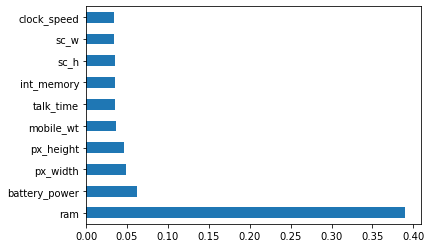

In [5]:
import pandas as pd
import numpy as np
data = pd.read_csv("../data/train.csv")
X = data.iloc[:,0:20]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

## IV - Recursive Feature Selection

The Recursive Feature Elimination (or RFE) works by recursively removing attributes and building a model on those attributes that remain.

It uses the model accuracy to identify which attributes (and combination of attributes) contribute the most to predicting the target attribute.

You can learn more about the RFE class in the scikit-learn documentation.

The example below uses RFE with the logistic regression algorithm to select the top 3 features. The choice of algorithm does not matter too much as long as it is skillful and consistent.

In [6]:
# evaluate RFE for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

array = data.values
X = array[:,0:20]
y = array[:,20]
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.853 (0.028)


In [7]:
fit = rfe.fit(X, y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 5
Selected Features: [ True False False False False False False False  True False False  True
  True  True False False False False False False]
Feature Ranking: [ 1 10  2 11 12 13  3  6  1  8  4  1  1  1  7  5  9 16 14 15]


You can see that RFE chose the the top 5 features as preg, mass and pedi.

Note: Your results may vary given the stochastic nature of the algorithm or evaluation procedure, or differences in numerical precision. Consider running the example a few times and compare the average outcome.

These are marked True in the support_ array and marked with a choice “1” in the ranking_ array.

## V - Heatmap 

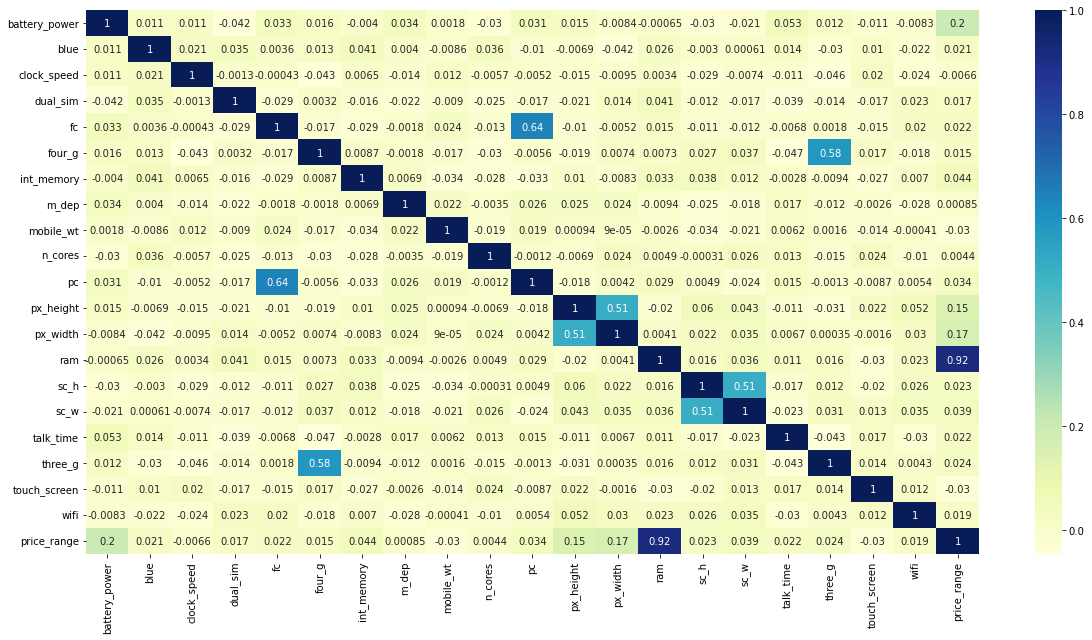

In [11]:
import seaborn

# print(data.corr())
plt.figure(figsize=(20,10))
dataplot = seaborn.heatmap(data.corr(), cmap="YlGnBu", annot=True)

# displaying heatmap
plt.show()

## Congrats you made it 🚀